### Giacomo Zema
### s269614
### Homework 2

#### Problem 1

In [63]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand 
import matplotlib.pyplot as plt

We are asked to simulate a particle moving around in the network in continuous time according to the transition rate matrix $\Lambda$ 

$$\Lambda = \begin{pmatrix}
0 & 2/5 & 1/5 & 0 & 0\\
0 & 0 & 3/4 & 1/4 & 0\\
1/2 & 0 & 0 & 1/2 & 0\\
0 & 0 & 1/3 & 0 & 2/3\\
0 & 1/3 & 0 & 1/3 & 0\\
\end{pmatrix}$$.

#### 1.a

What is, according to the simulations, the average time it takes a particle that starts in node a to leave the node and then return to it?


The walk starts in node 'a' and we need to simulate different walks over the graph and compute the average time it took for a particle that started its walk on node a to return to it for the first time. 
We are using a simulation to compute the expected value of a random variable.

##### Drawing the graph

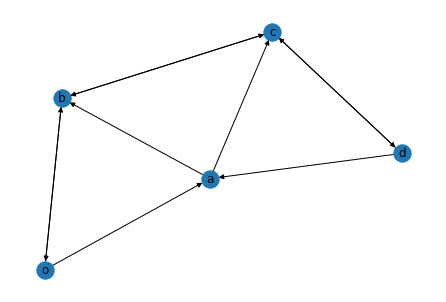

In [64]:
G = nx.DiGraph()

nodes = ['o', 'a', 'b', 'c', 'd']

G.add_nodes_from(nodes)

edges = [("o","a"), ("o","b"), ("a","b"),
         ("a","c"), ("d","a"), ("d","c"),
         ("c","d"), ("c","b"), ("b","o"), ("b","c")]

G.add_edges_from(edges)

nx.draw(G, with_labels=True)


##### Simulate the random walk and compute the average return time

In [65]:
Lambda = np.array([[0,2/5,1/5,0,0],
                   [0,0,3/4,1/4,0],
                   [1/2,0,0,1/2,0],
                   [0,0,1/3,0,2/3],
                   [0,1/3,0,1/3,0]])

degree = np.sum(Lambda, axis=1)
w_max = np.max(degree)
D = np.diag(degree)
P = np.linalg.inv(D)@Lambda
cum_prob = np.cumsum(P, axis=1) #hint 2



In [66]:
#construct a dictionary that maps the label of nodes
n_nodes = len(nodes)
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i

#compute the average over 10000 simulations
n_runs = 10000
ret_times = np.zeros(n_runs)

for run in range(n_runs):
    node = indices['a']
    next_t = -np.log(rand())/degree[node] #time taken for the first jump
    while True: #iterate until it returns to node a
        ret_times[run] += next_t #adding up the times for each jump
        #choose the next node considering the probabilities of each possible jump
        node = np.argwhere(cum_prob[node]>rand())[0][0]#use cumulative probabilty distribution to choose next node
        if node == indices['a']:
            break #stop when the particle has returned to node 'a'
        next_t = -np.log(np.random.rand())/degree[node] #time taken for next jump

exp_r_time = np.mean(ret_times)

print("Average return time for node a: ", exp_r_time)    

Average return time for node a:  6.746899159720104


#### 1.b
##### Compute the theoretical return time and compare it with the previous result 

As we know from theory, the theoretical return times are equal to:
$$ E_i[T^+_i]=\frac{1}{w_i\bar{\pi_i}} $$

So the caputation of the theoretical return times consists in computing the stationary probability vector $\bar{\pi}$ which is done by solving the linear system of equations:
$$ L^T\bar{\pi}=0 $$
$$ \bar{\pi}\mathbf{1}=1 $$

Where L is the Laplacian matrix for $\Lambda$

The system we obtain is:

$\begin{pmatrix}
1 & 1 & 1 & 1 & 1\\
3/5 & 0 & -1/2 & 0 & 0\\
-2/5 & 1 & 0 & 0 & -1/3\\
-1/5 & -3/4 & 1 & -1/3 & 0\\
0 & -1/4 & -1/2 & 1 & -1/3\\
0 & 0 & 0 & -2/3 & 2/3\\
\end{pmatrix}$ $\begin{pmatrix}
\bar{\pi_o}\\
\bar{\pi}_a\\
\bar{\pi_b}\\
\bar{\pi_c}\\
\bar{\pi_d}\\
\end{pmatrix}$ = $\begin{pmatrix}
1\\
0\\
0\\
0\\
0\\
\end{pmatrix}$

where the matrix is the combination of the two terms of the system

In [319]:
Lambda = np.array([[0,2/5,1/5,0,0],
                   [0,0,3/4,1/4,0],
                   [1/2,0,0,1/2,0],
                   [0,0,1/3,0,2/3],
                   [0,1/3,0,1/3,0]])

degree = np.sum(Lambda, axis=1)
w_max = np.max(degree)
D = np.diag(degree)
P = np.linalg.inv(D)@Lambda
L = D-Lambda

A = np.vstack([[1,1,1,1,1],L.T])
b = np.array([1,0,0,0,0,0])

pi_bar= np.linalg.pinv(A) @ b
return_times=np.zeros(5)
for i in range(5):
    return_times[i]=1/(degree[i]*pi_bar[i])

print("Theoretical return time for node a: %.6f"%return_times[1])

Theoretical return time for node a: 6.750000


The average return time computed over 10000 simulations is very close to the theoretical return time computed analytically

#### 1.c

If the walk does not start in the arrival node, the return times and the hitting times are the same

This means that we can use the same procedure as in point 1.a to compute the average hitting time, but this time we stop adding up the time when the particle reaches the arrival node for the first time, instead of returning to the initial node.

In [32]:
#compute the average over 10000 simulations
n_runs = 10000
ret_times = np.zeros(n_runs)

for run in range(n_runs):
    node = indices['o'] #the particle starts in node 'o'
    next_t = -np.log(rand())/degree[node] #time taken for the first jump
    while True: #iterate until it returns to node a
        ret_times[run] += next_t #adding up the times for each jump
        #choose the next node considering the probabilities of each possible jump
        node = np.argwhere(cum_prob[node]>rand())[0][0]
        if node == indices['d']:
            break #stop when the particle has reached node 'd'
        next_t = -np.log(np.random.rand())/degree[node] #time taken for next jump

exp_h_time = np.mean(ret_times)

print("Average hitting time for node d, starting from node o: ", exp_h_time)

Average hitting time for node d, starting from node o:  8.75494716661325


#### 1.d
##### Compute the theoretical hitting time and compare it with the previous result 

From theory we know that for Continuous time Markov Chains we have the following recursive formula:
$$\mathbb{E}_o[T_d] = \frac{1}{w_*} + \sum_{j} P_{o,j}\;\mathbb{E}_j[T_d]$$
$$E_d[T_d] = 0$$

In our case we want to compute the theoretical hitting time from node o to node d, the subset that the hitting time refers to is composed of just node d.
So we can rewrite the formula for our specific case:
$$E_o[T_d]=5/3+P_{oa}E_a[T_d]+P_{ob}E_b[T_d]$$

The resulting linear system of equation is the following:

$\begin{pmatrix}
1 & -2/3 & -1/3 & 0 \\
0 & 1 & -3/4 & -1/4 \\
-1/2 & 0 & 1 & -1/2 \\
0 & 0 & -1/3 & 1 \\
\end{pmatrix}$ $\begin{pmatrix}
E_o[T_d]\\
E_a[T_d]\\
E_b[T_d]\\
E_c[T_d]\\
\end{pmatrix}$ = $\begin{pmatrix}
5/3\\
1\\
1\\
1\\
\end{pmatrix}$  

In [322]:
Lambda = np.array([[0,2/5,1/5,0,0],
                   [0,0,3/4,1/4,0],
                   [1/2,0,0,1/2,0],
                   [0,0,1/3,0,2/3],
                   [0,1/3,0,1/3,0]])

degree = np.sum(Lambda, axis=1)
w_max = np.max(degree)
D = np.diag(degree)
P = np.linalg.inv(D)@Lambda
L = D-Lambda


A=P-np.diag(np.ones(5))
#eliminate row and column of node d
A=np.delete(A, (4), axis=0)
A=np.delete(A, (4), axis=1)
B= -(1/degree)
#ignore node d
B=B[:4]
x= np.linalg.inv(A) @ B
x= np.append(x,0)

print("The theoretical hitting time from node o to node d is: %.6f"%x[0])

The theoretical hitting time from node o to node d is: 8.785714


We can observe that the value computed analytically is very close to the value obtained through the simulation

#### Problem 2

In this problem we will simulate many particles moving around in the network in continuous time.

#### 2.a
##### Particle perspective

If 100 particles start in node a, what is the average time for a particle to return to node a?

The various particles are not interacting with each other, each particle moves when the Poisson clock associated to it ticks. The rate of the Poisson clocks are given by the degree of the nodes that the particles are located in before the clock ticks.
What we need to do is simulate the walks of 100 particles like in the first problem we simulated the walk of a single particle. In the end we will compute the average return time across all the particles.

We exclude the particles from the simulation as they return to the initial node and stop the simulation when all particles have returned.

In [108]:
Lambda = np.array([[0,2/5,1/5,0,0],
                   [0,0,3/4,1/4,0],
                   [1/2,0,0,1/2,0],
                   [0,0,1/3,0,2/3],
                   [0,1/3,0,1/3,0]])

degree = np.sum(Lambda, axis=1)
w_max = np.max(degree)
D = np.diag(degree)
P = np.linalg.inv(D)@Lambda
cum_prob = np.cumsum(P, axis=1) #hint 2

In [258]:
n_runs = 1000

n_particles = 100
initial_node = 1

cum_prob = np.cumsum(P, axis=1)

#we store the return times for each particle over each simulation
ret_times = np.zeros((n_particles, n_runs))


for run in range(n_runs):
    #we keep track of the current position of every particle starting from position = 1 (node a)
    states = np.ones(n_particles, dtype=int) 
    #we keep track of the rate of the Poisson clock of each particle, which is the degree of the node where they are
    rates = np.ones(n_particles)
    for i in range(n_particles):
        rates[i]=degree[states[i]]
        
    #time for the first tick for each particle
    next_t = -np.log(np.random.rand(n_particles))/rates
    
    #keep track of the particles that have returned to the initial node
    #if running[i] == True, the particle has not returned
    running = np.ones(n_particles, dtype=bool)
    
    while True:
        #start iterating  stop when all particles return to the initial node
        #increment the total time for each particles if they have not returned
        ret_times[running, run] += next_t[running]
        
        #assign a new state to every particle, if they have returned the time will not be increased
        for particle in range(n_particles):
            states[particle] = np.argwhere(cum_prob[states[particle]] > np.random.rand())[0][0]
        
        #check if any particle has returned to the initial node
        running[states == 1] = False
        #check if every particle has returned to the initial node
        if np.sum(1*running) == 0: 
            break
        
        #update the rates of the Poisson clocks of every particle
        for i in range(n_particles):
            rates[i]=degree[states[i]]
        
        #compute time of next jump for every particle 
        next_t = -np.log(np.random.rand(n_particles))/rates
        

print("Average return time to node a across all particles over 1000 simulations: ", np.mean(ret_times))

Average return time to node a across all particles over 1000 simulations:  6.736026158276114


We can observe empirically how the fact that the Poisson clocks associated to the particles are independent results in independent random walks for every particle. So the average return time is very close to the previous simulation.
The difference with the previous exercise is that before we were running the simulations one after the other, while now for every run we are simulating the movement of 100 particles at the same time, but in the end the fact that they are moving in the graph at the same time doesn't make a difference since there is no interaction between them.

#### 2.b
##### Node perspective

Now we need to observe the particles from the nodes, our interest is on the number of particles in each node.
This time, instead of having 100 independent Poisson clocks, we have a system-wide Poisson clock with rate 100, at each tick of this clock, we select a node randomly (proportionally to the number of particles in the nodes), we will then move a particle from this selected node to another note selected accordingly to the transition probability matrix $\bar{P}$
This matrix is obtained by dividing the entries of the transition matrix lambda, which generates a matrix that is not stochastic, to each diagonal entry of this matrix is added a quantity equal to 1 minus the sum of the entries of that row, this way the resulting matrix is stochastic. 
This correspondes to adding self loops to the graph and means that if the Poisson clock clicks, a particle in the selected node has a probability to leave the node that is equal to the sum of the values on the row of the $\bar{P}$ matrix corresponding to that node, excluding the diagonal value, which corresponds to the probability that the particle will remain in that node.

##### Simulate the system for 60 time units and plot the evolution of the number of particles in each node over time

In [306]:
Lambda = np.array([[0,2/5,1/5,0,0],
                   [0,0,3/4,1/4,0],
                   [1/2,0,0,1/2,0],
                   [0,0,1/3,0,2/3],
                   [0,1/3,0,1/3,0]])

degree = np.sum(Lambda, axis=1)
w_max = np.max(degree)
D = np.diag(degree)
P = np.linalg.inv(D)@Lambda

P_bar = Lambda/w_max
P_bar = P_bar + np.diag(np.ones(len(degree))-degree/w_max)
print(P_bar)

cum_prob = np.cumsum(P_bar, axis=1) #hint 2



[[0.4        0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.33333333 0.         0.33333333 0.33333333]]


In [307]:
n_runs = 100
n_particles = 100 
n_nodes = 5

# for each simulation we keep track of the number of particles that are on every node after 60 units of time
nodes_state = np.zeros((n_nodes, n_runs))

for run in range(n_runs):    
    # we keep track of the number of particles on every node at a specific time
    # the last entry is the current time  
    #the initial configuration has every particle starting in node o
    current_state = np.array([100, 0, 0, 0, 0, 0], dtype=float)
    
    # this array contains all the configurations of the nodes across the simulations
    node_perspective = np.array([[100, 0, 0, 0, 0, 0]], dtype=float)
    
    # the probability that when the clock ticks a node is selected is 
    # given by the number of particles currently on that node
    node_prob = current_state[:5]/n_particles 
    node_cum = np.cumsum(node_prob)
    
    #keep going until the elapsed time reaches 60 units
    while current_state[-1] < 60:
        # randomly select a node
        node = np.argwhere(node_cum > np.random.rand())[0][0]
        
        #the rate of the global poisson clock is 100*w_max
        t_next = -np.log(np.random.rand())/(w_max*n_particles) 
        #increment the total time elapsed
        current_state[-1] += t_next
        
        # the node from which the particle will move is selected
        next_node = np.argwhere(cum_prob[node] > np.random.rand())[0][0]
        
        # the particle is removed from the count of the old node
        current_state[node]-=1 
        #the particle is added to the count of the new node
        current_state[next_node] +=1
        
        # we stack all the states so we can plot them after
        node_perspective = np.vstack((node_perspective, current_state))
        
        # updates node selection probabilities according to the new configuration
        node_prob = current_state[:5]/n_particles 
        node_cum = np.cumsum(node_prob)
    
    # we save the number of particles on each node at the end of the run
    nodes_state[:, run] = current_state[:5]
    
print("average number of particles on each node after 60 time units: ")
avg_part_number = np.mean(nodes_state, axis=1)
for i in range(5):
    print("node "+str(i)+" : "+str(avg_part_number[i]))

average number of particles on each node after 60 time units: 
node 0 : 18.95
node 1 : 14.82
node 2 : 22.16
node 3 : 22.11
node 4 : 21.96


Since the graph that has the transition matrix of our Markov chain as the weight matrix is strongly connected, we know from theory that for time that approaches infinite the limit of the marginal distribution for node i (probability that there will be a particle on node i at time t) is equal to the invariant distribution of $\bar{P}$
$$\lim_{t\rightarrow \infty} \bar{\pi}(t)=\bar{\pi}$$

Computing $\bar{\pi}$ can be done by solving the corresponding linear system of equations

In [308]:
P_bar = Lambda/w_max
P_bar = P_bar + np.diag(np.ones(len(degree))-np.sum(P_bar, axis=1)) 
w,v = np.linalg.eig(P_bar.T)
for index in [i for i in range(len(Lambda[0])) if np.isclose(w[i],1)]: 
    pi = v[:,index].real 
    pi = pi/np.sum(pi)
    
print(pi)

[0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


Having computed $\bar{\pi}$, we can observe how its entries are very close to the average number of particles on each node computed through the simulation

##### Plot the evolution of the number of particles in each node over time

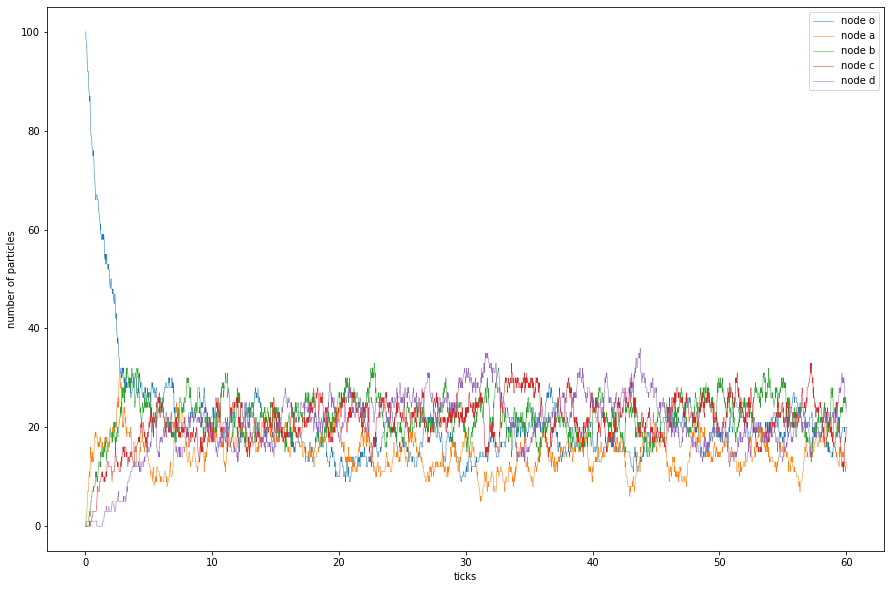

In [309]:
x = node_perspective[:,-1]
node_o = node_perspective[:, 0]
node_a = node_perspective[:, 1]
node_b = node_perspective[:, 2]
node_c = node_perspective[:, 3]
node_d = node_perspective[:, 4]

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, node_o, linewidth=0.5, label='node o')
ax.plot(x, node_a, linewidth=0.5, label='node a')
ax.plot(x, node_b, linewidth=0.5, label='node b')
ax.plot(x, node_c, linewidth=0.5, label='node c')
ax.plot(x, node_d, linewidth=0.5, label='node d')

ax.set(xlabel = "ticks", ylabel = "number of particles")
ax.legend()
plt.show()

#### Problem 3

This time we consider an open network.

Particles will enter the system at node o accordina to a Poisson process with rate $\lambda=1$, each node will then pass along a particle according to a given rate.
The two scenarios we are asked to study differ by the rate of the Poisson clock of the node from which the particles will move, in the first scenario the rate is equal to the number of particles in the node, in the second scenario each node will have a fixed rate of 1.
One thing to be mentioned is that if the clock of node d ticks the particle will leave the node, but it won't be passed to another node of the graph, since it will leave the network. This does not take into consideration the fact that according to the $\bar{P}$ matrix there is a possibility that the particle does not leave node d (because of the self loops) equal to 1 - the probability that it does (sum of the other entries of the row of node d), so we need to add a sink node to the graph so that when a particle is in d it can either stay there or exit the graph going in the sink node. The sink node will be excluded when choosing a node to move a particle from.

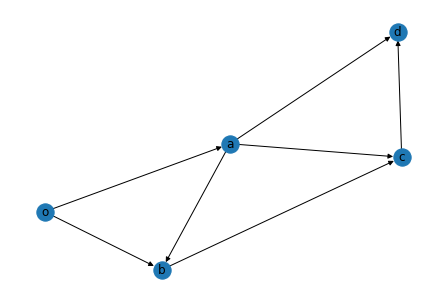

In [335]:
Lambda = np.array([[0, 2/3, 1/3, 0, 0], 
                    [0, 0, 1/4, 1/4, 2/4],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0]])
degree = np.sum(Lambda, axis=1)
w_max = np.max(w)
P_bar = Lambda/w_star
P_bar = P_bar + np.diag(np.ones(len(degree))-degree/w_max)

G1 = nx.DiGraph()

nodes1 = ['o', 'a', 'b', 'c', 'd']

G1.add_nodes_from(nodes1)

edges1 = [("o","a"), ("o","b"), ("a","b"),
          ("a","c"), ("a","d"), ("c","d"), 
          ("b","c") ]

G1.add_edges_from(edges1)

nx.draw(G1, with_labels=True)


We now can draw the graph with the added sink node and compute $\bar{P}$ from the transition matrix of this updated graph

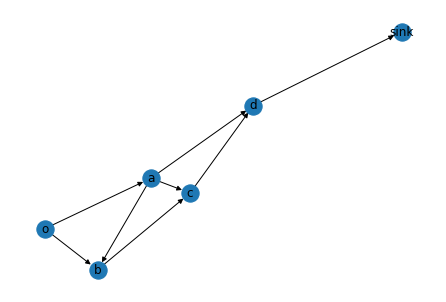

In [408]:
Lambda = np.array([[0, 2/3, 1/3, 0, 0, 0], 
                    [0, 0, 1/4, 1/4, 2/4, 0],
                    [0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0]])
degree = np.sum(Lambda, axis=1)
w_max = np.max(w)
P_bar = Lambda/w_star
P_bar = P_bar + np.diag(np.ones(len(degree))-degree/w_max)

G1 = nx.DiGraph()

nodes1 = ['o', 'a', 'b', 'c', 'd', 'sink']

G1.add_nodes_from(nodes1)

edges1 = [("o","a"), ("o","b"), ("a","b"),
          ("a","c"), ("a","d"), ("c","d"), 
          ("b","c"), ("d", "sink")]

G1.add_edges_from(edges1)

nx.draw(G1, with_labels=True)

##### Proportional rate

Simulate the system for 60 units of time

We need to take into consideration the fact that a configuration in which all of the nodes have zero particles on them is possible and this would mean that the total number of particles is equal to 0, so the rate of the global Poisson clock would be 0 and computing the time for next jump would imply dividing by zero. To tackle this issue is necessary to check if at any moment (before 60 units of time have elapsed) there are particles still left on the network, in case there are none, we need to wait for the input Poisson clock to tick and add a particle to node o.

Another consideration concerns the way to deal with the fact that the particles do not start all in node o, but there is a Poisson clock with a certain input rate. The way we deal with this is to create an array of times at which the input Poisson clock ticked before 60 units of time. (the number of entries of this array is a Poisson process - number of events that take place in time t). After each evolution of the system due to a particle passing from a node to another, we check if in the time elapsed from the previous tick, a new particle has entered in node o according to the input Poisson clock. 

Moreover, in the second part of the problem we are asked to assess the maximum input rate that the system can handle, so we will run a simulation for a number of increasing input rates to observe the behaviour of the system.

Given these considerations, the problem becomes similar to the node perspective in 2.b

In [430]:
cum_prob = np.cumsum(P_bar, axis=1)

58


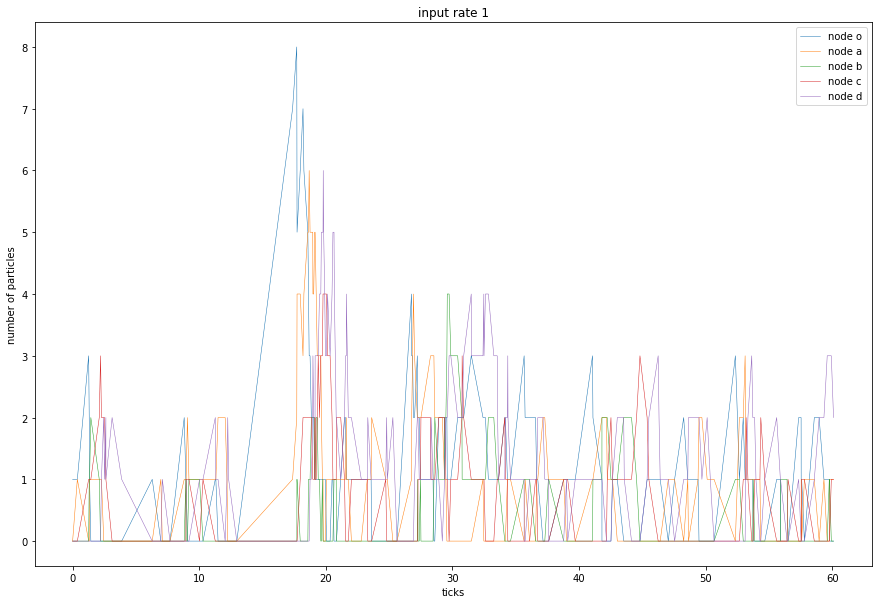

614


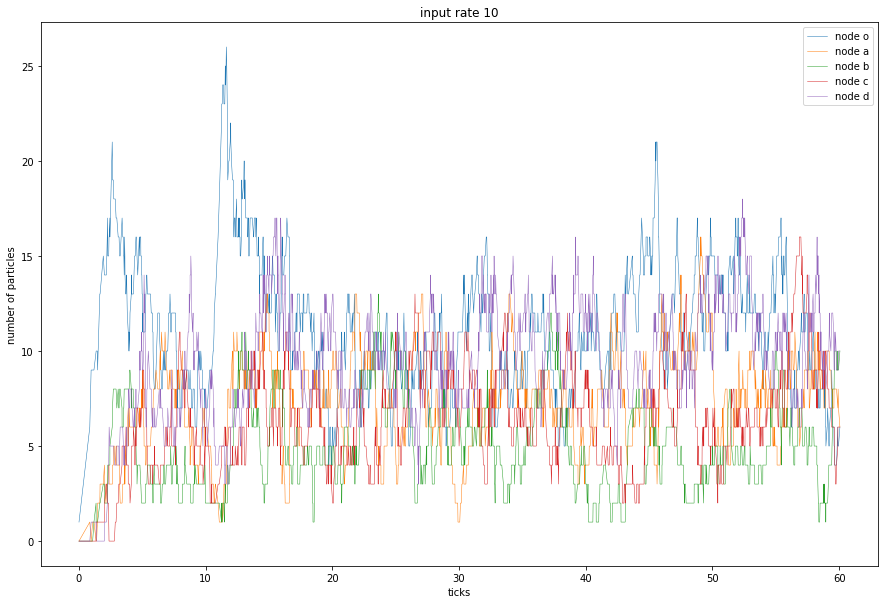

6003


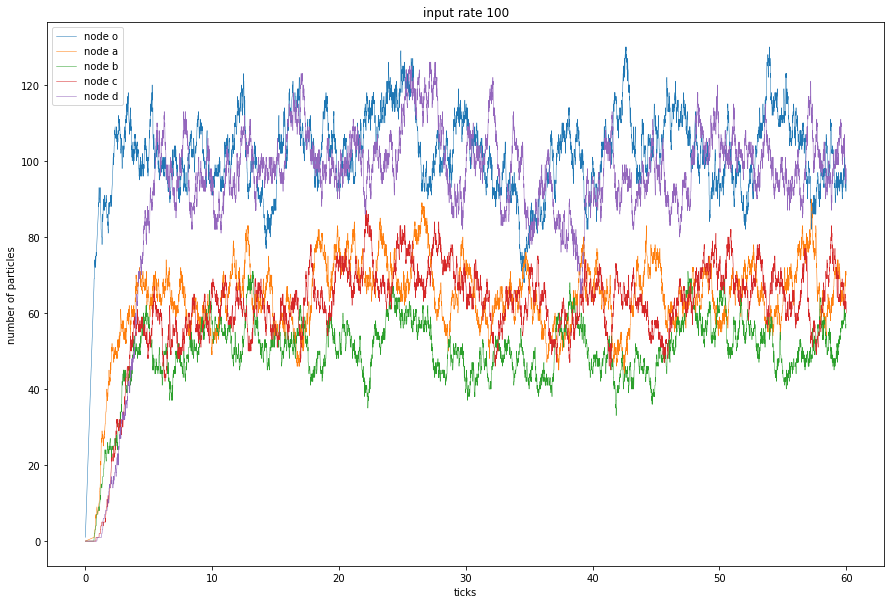

In [431]:
#iterate over input rates
for input_rate in [1, 10, 100]:
    #create the vector of input times
    #the number of elements of this array is a random variable
    #we append elements to it as the clock ticks
    #the first element is zero because we assume that at time 0 there is 1 particle on node o
    input_times = [0]
    total_time = 0
    while total_time < 60:
        next_t = -np.log(rand())/input_rate
        total_time += next_t
        input_times.append(total_time)
    #convert the list into a numpy array
    input_times = np.array(input_times)
    print(len(input_times))
    #we have the same arrays as in the node perspective problem
    #the starting configuration is at time 0 with one particle in node o
    current_state = np.array([1, 0, 0, 0, 0, 0, 0], dtype=float) 
    node_perspective = np.array([[1, 0, 0, 0, 0, 0, 0]], dtype=float)
    
    #keep going until the elapsed time reaches 60 units
    while current_state[-1] < 60:
        #compute the total number of particles currently on the network
        #exclude sink node from this computation
        tot_particles = np.sum(current_state[:5])
        #check if there are no particles left
        if tot_particles==0:
            #wait until the input Poisson clock ticks
            current_state[-1] = input_times[input_times>current_state[-1]][0] 
            #add one particle to node o and to the total count 
            current_state[0] += 1
            tot_particles = 1
            continue
        #choose node randomly based on the number of particles on each node
        #sink node is excluded from this
        node_cum = np.cumsum(current_state[:5]/tot_particles) 
        node = np.argwhere(node_cum > rand())[0][0] 
        #compute the time it takes for a particle to jump
        next_t = -np.log(rand())/tot_particles 
        #increase the total amount of time elapsed
        current_state[-1] += next_t
        #decrease the amount of particles on the current node
        #if the node goes into the sink this means that the particle has left the network
        current_state[node] -= 1
        
        #select the next node randomly based on the P_bar matrix
        next_node = np.argwhere(cum_prob[node] > np.random.rand())[0][0]
        
        #we update the number of particle on the nodes only if we are not in the sink node
        if node != 5:
            current_state[next_node] += 1
            
        #if new particles have entered the network we increase the amount of particles on node o 
        #by the number of times the input clock has ticked in between the last tick of the global clock 
        #and the next tick that has just happened 
        new_particles = np.sum((input_times>node_perspective[-1][-1])&(input_times<=current_state[-1]))
        current_state[0] += new_particles
        
        #we save the current configuration
        node_perspective = np.vstack((node_perspective, current_state))
        
    #plot the final state for each input rate
    x = node_perspective[:,-1]
    node_o = node_perspective[:, 0]
    node_a = node_perspective[:, 1]
    node_b = node_perspective[:, 2]
    node_c = node_perspective[:, 3]
    node_d = node_perspective[:, 4]

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(x, node_o, linewidth=0.5, label='node o')
    ax.plot(x, node_a, linewidth=0.5, label='node a')
    ax.plot(x, node_b, linewidth=0.5, label='node b')
    ax.plot(x, node_c, linewidth=0.5, label='node c')
    ax.plot(x, node_d, linewidth=0.5, label='node d')

    ax.set(title = "input rate %d"%input_rate, xlabel = "ticks", ylabel = "number of particles")
    ax.legend()
    plt.show()
        


We can observe from the plots how the fact that the node from which the particle departs is chosen with a probability proportional to the amount of particles sitting on that node avoids the concentration of too many particles in the same node, even with an input rate of 100 we do not experience any congestion

##### Fixed rate

In this simulation each node will pass along particles with a fixed rate of 1.

The procedure for this problem is very similar to that of the proportional rate, the crucial difference are the probability vector for choosing the node from which the particle moves and the rates of the global Poisson clock.

29


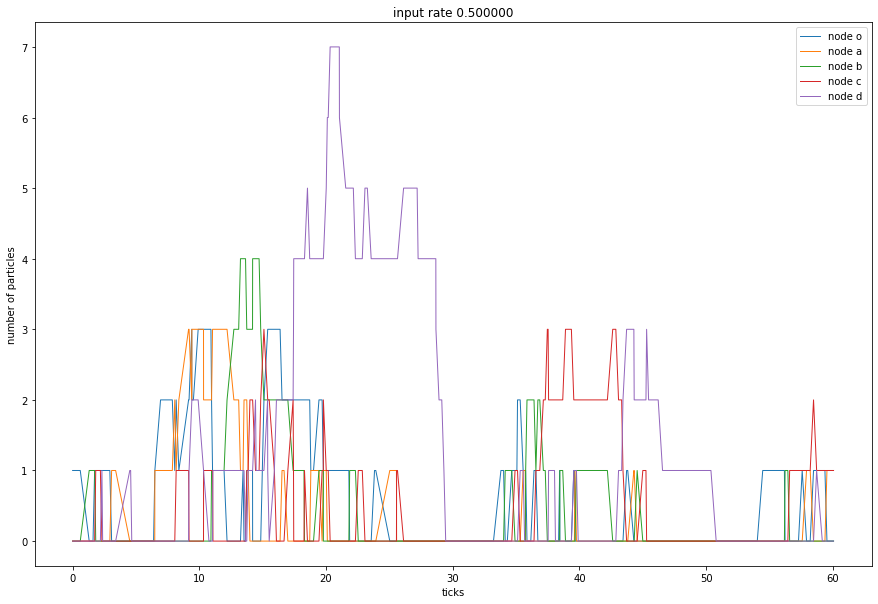

40


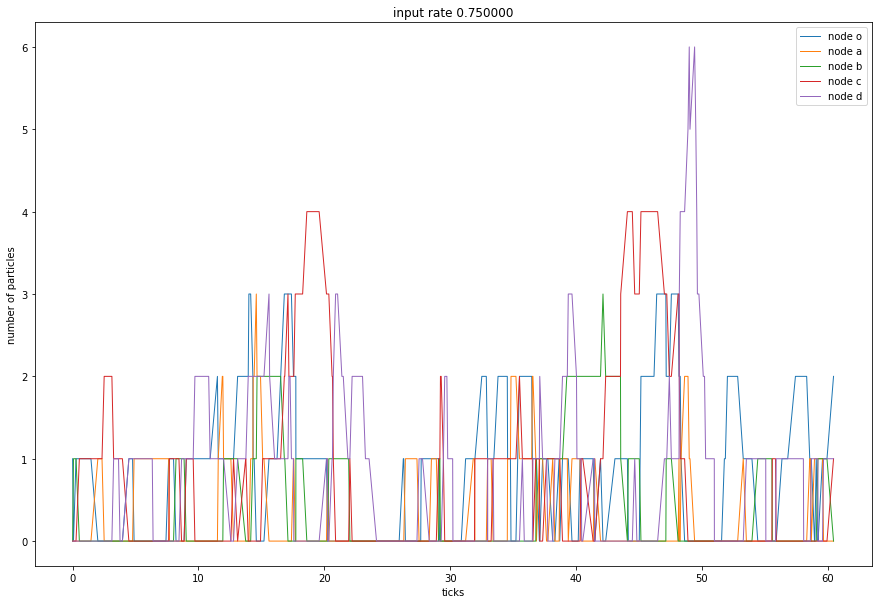

49


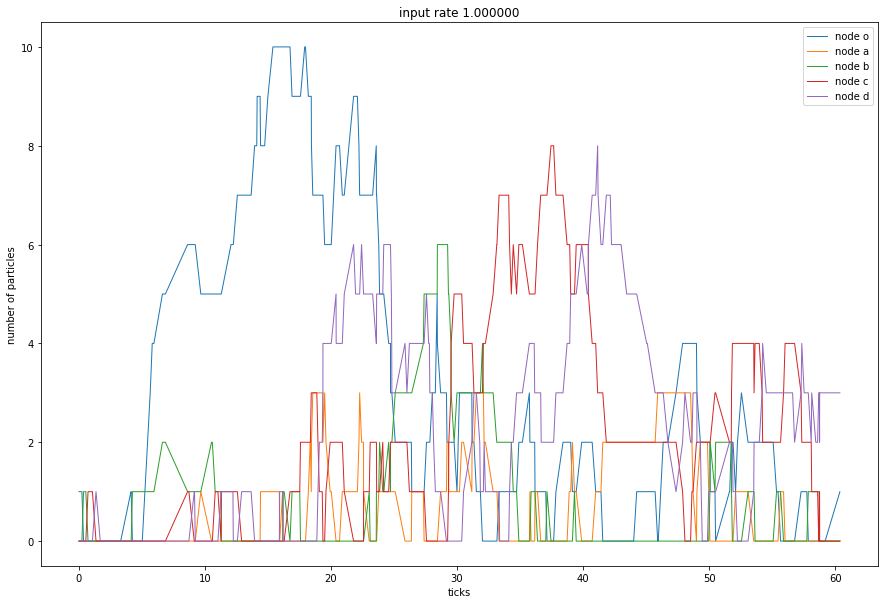

108


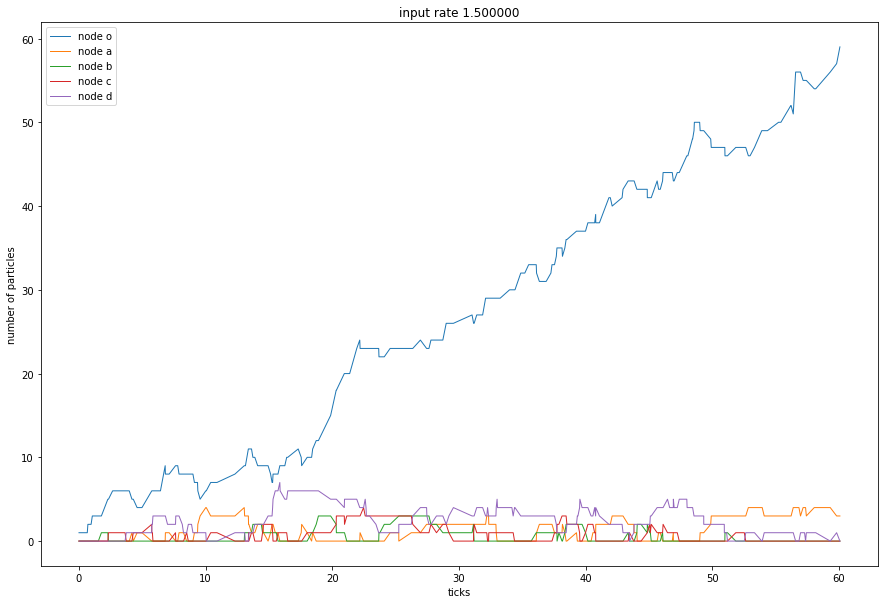

125


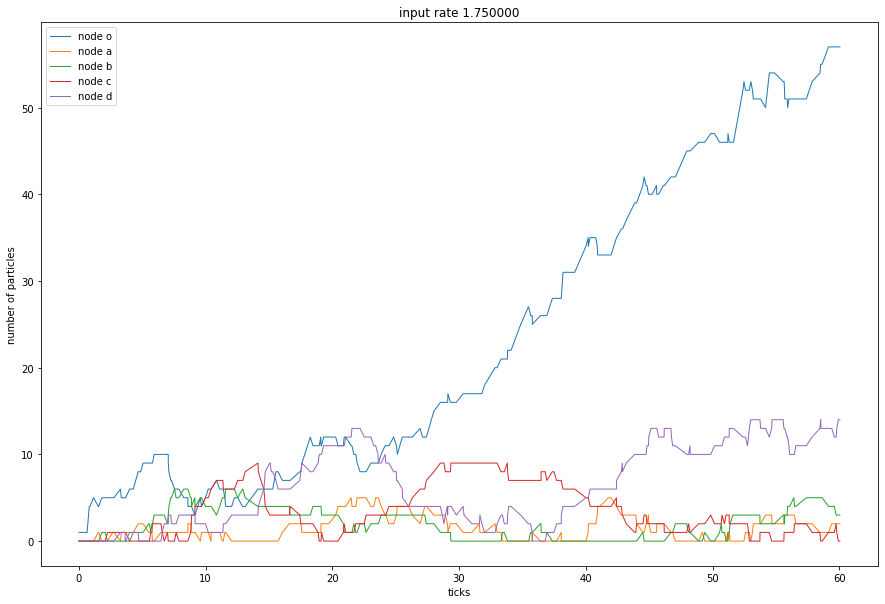

132


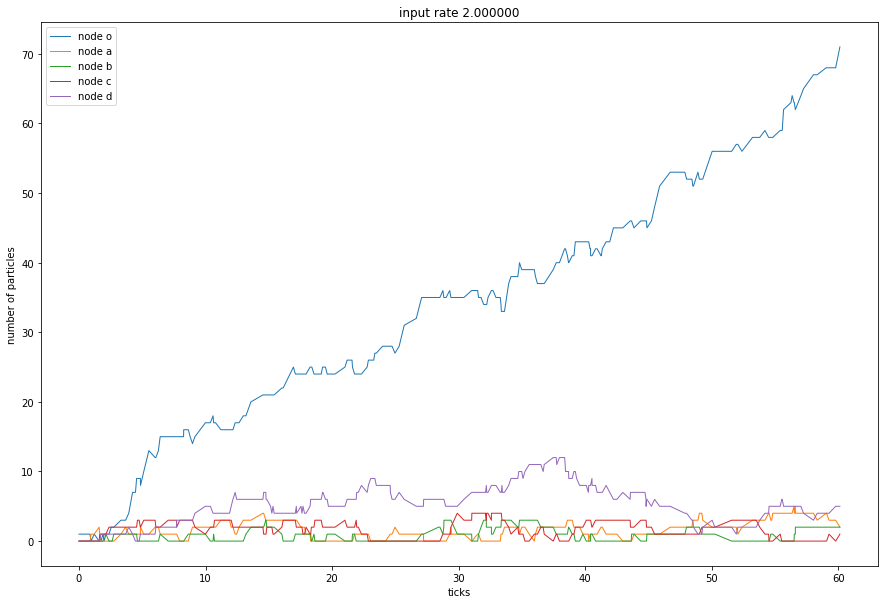

601


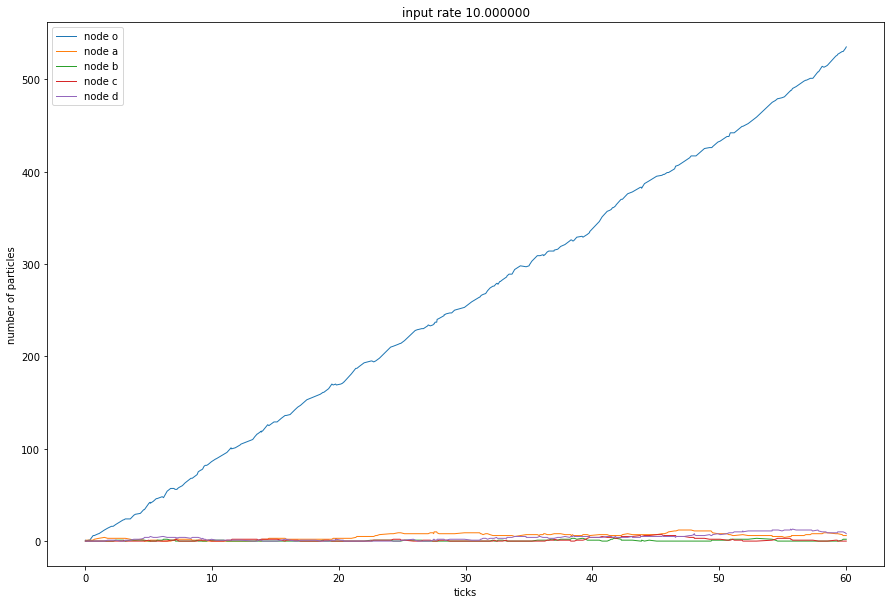

In [441]:
cum_prob = np.cumsum(P_bar, axis=1)

#iterate over input rates
for input_rate in [0.5, 0.75, 1, 1.5, 1.75, 2, 10]:
    #create the vector of input times
    #the number of elements of this array is a random variable
    #we append elements to it as the clock ticks
    #the first element is zero because we assume that at time 0 there is 1 particle on node o
    input_times = [0]
    total_time = 0
    while total_time < 60:
        next_t = -np.log(rand())/input_rate
        total_time += next_t
        input_times.append(total_time)
    #convert the list into a numpy array
    input_times = np.array(input_times)
    print(len(input_times))
    #we have the same arrays as in the node perspective problem
    #the starting configuration is at time 0 with one particle in node o
    current_state = np.array([1, 0, 0, 0, 0, 0, 0], dtype=float) 
    node_perspective = np.array([[1, 0, 0, 0, 0, 0, 0]], dtype=float)
    
    #the probability of choosing a node is fixed throughout the simulation
    #exclude sink node from this, 5 is the number of nodes of the original graph
    node_cum = np.cumsum(np.ones(5)/5)
    
    #keep going until the elapsed time reaches 60 units
    while current_state[-1] < 60:
        
        #this time we do not need to check if the total amount of particles
        #currently on the network is greater than zero, because we will not divide by that amount
        #choose node randomly 
        node = np.argwhere(node_cum > rand())[0][0] 
        #compute the time it takes for a particle to jump
        #the rate is 1 for all nodes
        next_t = -np.log(rand())/5
        #increase the total amount of time elapsed
        current_state[-1] += next_t
        
        #with the fixed rate there is the possibility that the node selected 
        #does not have any particles on it, so we have to check 
        #and apply the change only if there is a particle on the selected node
        if current_state[node]>0:
            #decrease the amount of particles on the current node
            current_state[node] -= 1
            #select the next node randomly based on the P_bar matrix
            next_node = np.argwhere(cum_prob[node] > np.random.rand())[0][0]

            #we update the number of particle on the nodes only if we are not in the sink node
            if node != 5:
                current_state[next_node] += 1         
                    
        #if new particles have entered the network we increase the amount of particles on node o 
        #by the number of times the input clock has ticked in between the last tick of the global clock 
        #and the next tick that has just happened 
        new_particles = np.sum((input_times>node_perspective[-1][-1])&(input_times<=current_state[-1]))
        current_state[0] += new_particles
        #it is at this point that the congestion can originate
        
        #we save the current configuration
        node_perspective = np.vstack((node_perspective, current_state))
        
    #plot the final state for each input rate
    x = node_perspective[:,-1]
    node_o = node_perspective[:, 0]
    node_a = node_perspective[:, 1]
    node_b = node_perspective[:, 2]
    node_c = node_perspective[:, 3]
    node_d = node_perspective[:, 4]

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(x, node_o, linewidth=1, label='node o')
    ax.plot(x, node_a, linewidth=1, label='node a')
    ax.plot(x, node_b, linewidth=1, label='node b')
    ax.plot(x, node_c, linewidth=1, label='node c')
    ax.plot(x, node_d, linewidth=1, label='node d')

    ax.set(title = "input rate %f"%input_rate, xlabel = "ticks", ylabel = "number of particles")
    ax.legend()
    plt.show()

There is a good chance that the node chosen did not have particles on it, while in the same time the global Poisson clock ticks multiple times before a node with particles on it is selected, the input clock ticks several times adding more and more particles to the same node.

If the input rate is higher than the rate of the nodes the number of particles on node o will grow much faster than the amount on the other nodes because particles are being added much faster than they are taken away and this higher amount of particles on one node won't affect neither the rate at which the global Poisson clock will tick, nor the probability that the node to be selected will be that node.

So it is clear that when the rate of the input clock is higher than the rate of the nodes in the network, the system cannot keep up with the particles that are being added, and the higher the input rate, the higher this discrepancy is going to be.
